In [49]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="subprocess.run")

%run utility_functions.ipynb

In [2]:
df = pd.read_csv("data/FedCycleData.csv")
df.sample(5)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
1584,nfp8323,9,0,1,0,27,,14,13,12,...,,,,,,,,,,
506,nfp8107,7,0,1,0,28,,19,9,,...,,,,,,,,,,
348,nfp8073,12,0,1,0,33,,20,13,14,...,,,,,,,,,,
1077,nfp8235,1,1,1,1,38,36.33,16,22,10,...,0,4,32009,3,0,0,1,1,0,19.9338374291115
1310,nfp8278,10,0,1,0,28,,13,15,11,...,,,,,,,,,,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [4]:
print("Total null values",sum(df.isna().sum()))
df.isna().sum()

Total null values 0


ClientID                0
CycleNumber             0
Group                   0
CycleWithPeakorNot      0
ReproductiveCategory    0
                       ..
NextpregM               0
Spousesame              0
SpousesameM             0
Timeattemptpreg         0
BMI                     0
Length: 80, dtype: int64

## Data types of each column

In [5]:
types = df.dtypes
columns = df.columns

list(zip(types, columns))

[(dtype('O'), 'ClientID'),
 (dtype('int64'), 'CycleNumber'),
 (dtype('int64'), 'Group'),
 (dtype('int64'), 'CycleWithPeakorNot'),
 (dtype('int64'), 'ReproductiveCategory'),
 (dtype('int64'), 'LengthofCycle'),
 (dtype('O'), 'MeanCycleLength'),
 (dtype('O'), 'EstimatedDayofOvulation'),
 (dtype('O'), 'LengthofLutealPhase'),
 (dtype('O'), 'FirstDayofHigh'),
 (dtype('O'), 'TotalNumberofHighDays'),
 (dtype('O'), 'TotalHighPostPeak'),
 (dtype('O'), 'TotalNumberofPeakDays'),
 (dtype('O'), 'TotalDaysofFertility'),
 (dtype('O'), 'TotalFertilityFormula'),
 (dtype('O'), 'LengthofMenses'),
 (dtype('O'), 'MeanMensesLength'),
 (dtype('O'), 'MensesScoreDayOne'),
 (dtype('O'), 'MensesScoreDayTwo'),
 (dtype('O'), 'MensesScoreDayThree'),
 (dtype('O'), 'MensesScoreDayFour'),
 (dtype('O'), 'MensesScoreDayFive'),
 (dtype('O'), 'MensesScoreDaySix'),
 (dtype('O'), 'MensesScoreDaySeven'),
 (dtype('O'), 'MensesScoreDayEight'),
 (dtype('O'), 'MensesScoreDayNine'),
 (dtype('O'), 'MensesScoreDayTen'),
 (dtype('O')

## BMI
There are lots of missing values in a form of empty string `" "`.

In [6]:
# Replace the empty string with NaN
df['BMI'] = df['BMI'].replace(" ", np.nan)
df['BMI'] = df['BMI'].astype(float) # ValueError: could not convert string to float: ' '

In [7]:
df.BMI.isnull().sum() / len(df)

0.9213213213213213

__92% null values in BMI column__



# Replace all the `" "` values with nan

In [8]:
df = df.replace(" ", np.nan)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1665 non-null   object 
 1   CycleNumber                 1665 non-null   int64  
 2   Group                       1665 non-null   int64  
 3   CycleWithPeakorNot          1665 non-null   int64  
 4   ReproductiveCategory        1665 non-null   int64  
 5   LengthofCycle               1665 non-null   int64  
 6   MeanCycleLength             141 non-null    object 
 7   EstimatedDayofOvulation     1515 non-null   object 
 8   LengthofLutealPhase         1514 non-null   object 
 9   FirstDayofHigh              1407 non-null   object 
 10  TotalNumberofHighDays       1653 non-null   object 
 11  TotalHighPostPeak           1662 non-null   object 
 12  TotalNumberofPeakDays       1649 non-null   object 
 13  TotalDaysofFertility        1634 

## List of feature which has missing values not more than 60%

In [10]:
null_percentages = df.isnull().mean() * 100
selected_features = null_percentages[null_percentages <= 90].index.tolist()
selected_df = df[selected_features]
selected_df.shape

(1665, 26)

In [11]:
selected_df.isnull().mean()

ClientID                      0.000000
CycleNumber                   0.000000
Group                         0.000000
CycleWithPeakorNot            0.000000
ReproductiveCategory          0.000000
LengthofCycle                 0.000000
EstimatedDayofOvulation       0.090090
LengthofLutealPhase           0.090691
FirstDayofHigh                0.154955
TotalNumberofHighDays         0.007207
TotalHighPostPeak             0.001802
TotalNumberofPeakDays         0.009610
TotalDaysofFertility          0.018619
TotalFertilityFormula         0.001201
LengthofMenses                0.002402
MensesScoreDayOne             0.002402
MensesScoreDayTwo             0.002402
MensesScoreDayThree           0.015015
MensesScoreDayFour            0.052252
MensesScoreDayFive            0.260661
MensesScoreDaySix             0.637838
MensesScoreDaySeven           0.865465
TotalMensesScore              0.002402
NumberofDaysofIntercourse     0.000601
IntercourseInFertileWindow    0.000601
UnusualBleeding          

In [12]:
# Remove unnecessary column
selected_df = selected_df.drop("ClientID", axis=1)

In [13]:
# Change the data type from object to float
selected_df = selected_df.astype("float")

## Creating the class

In [14]:
selected_df['Healthy'] = (selected_df['LengthofCycle'] >= 21) & (selected_df['LengthofCycle'] <= 35)
selected_df['Healthy'] = selected_df['Healthy'].replace({True: 1, False: 0})

In [15]:
n_women = df['ClientID'].nunique()
n_women, len(df), df['LengthofCycle'].nunique()

(159, 1665, 32)

In [16]:
# Fill the missing values
df_filled = selected_df.fillna(selected_df.mean())
sum(df_filled.isnull().sum())

0

In [17]:
df_filled.Healthy.value_counts(normalize=True)

Healthy
1    0.926126
0    0.073874
Name: proportion, dtype: float64

# Classification

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

X = df_filled.drop('Healthy', axis=1)
y = df_filled['Healthy']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [23]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [24]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the TabTransformer model
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim_embedding=64, num_heads=4, num_layers=4):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(num_features, dim_embedding)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_embedding, nhead=num_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Linear(dim_embedding, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Adding a sequence length dimension
        x = self.transformer(x)
        x = torch.mean(x, dim=1)  # Pooling
        x = self.classifier(x)
        return x

In [31]:
# Model parameters
num_features = X_train_scaled.shape[1]
num_classes = 6  # Adjusted based on unique labels

# Initialize the model, loss, and optimizer
model = TabTransformer(num_features, num_classes).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Converting data to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.LongTensor(y_val.values)

# Lists to store training and validation losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    train_loss = criterion(output, y_train_tensor)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        # Training accuracy
        train_preds = model(X_train_tensor)
        _, train_predicted_classes = torch.max(train_preds, 1)
        train_acc = (train_predicted_classes == y_train_tensor).float().mean()
        train_accuracies.append(train_acc.item())

        # Validation loss and accuracy
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)
        val_losses.append(val_loss.item())

        _, val_predicted_classes = torch.max(val_output, 1)
        val_acc = (val_predicted_classes == y_val_tensor).float().mean()
        val_accuracies.append(val_acc.item())

    if epoch % 10 == 0:
        # print(f'Epoch {epoch}, Train Loss: {train_loss.item()}, Validation Loss: {val_loss.item()}')
        print(f'{epoch}/{100} [===================] - loss: {train_loss.item():.4f} - accuracy: {train_acc.item():.4f} - val_loss: {val_loss.item():.4f} - val_accuracy: {val_acc.item():.4f}')

# Evaluation
model.eval()
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)

with torch.no_grad():
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)
    test_accuracy = (predicted_classes == y_test_tensor).float().mean()

print(f'Test Accuracy: {test_accuracy.item()}')

90/100 [===================] - loss: 0.0201 - accuracy: 0.9977 - val_loss: 0.1224 - val_accuracy: 0.9737
Test Accuracy: 0.9850746393203735


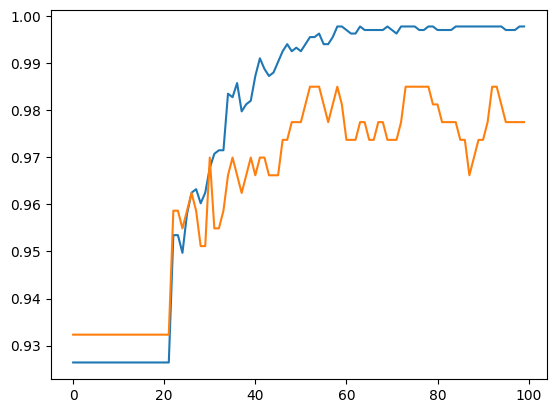

In [52]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies[:])
plt.plot(val_accuracies[:])

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Pass test features through the trained model
with torch.no_grad():
    predictions = model(X_test_tensor)
    _, y_pred_tensor = torch.max(predictions, 1)

# Convert predicted tensor to numpy array
y_pred = y_pred_tensor.numpy()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 7  0]
 [ 1 59]]


In [51]:
evaluate_classifier(y_test, y_pred)

Accuracy: 0.9850746268656716
AUC Score: 0.9916666666666667
F1 Score: 0.9915966386554622
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.98      0.99        60

    accuracy                           0.99        67
   macro avg       0.94      0.99      0.96        67
weighted avg       0.99      0.99      0.99        67

